# Classification

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
df = pd.read_csv('marketing_prep.csv', sep=';')

Необхідно виконати певні перетворення данних. Необхідно додати новий стовпець до нашого датафрейму. В даному стовпці буде записано вихідне значення порівняння витрат користувачів на вино з сумою значень трат користувача на інші категорії товарів. Оскільки на етапі підготовки даних, виконувалось логарифмування даних, то при порівнянні та сумуванні даних необхідно скористатись зворотною функцією - еспоненціюванням. Якщо трати на вино користувача будуть більшими, ніж трати на інші продукти, то в стовпці споживачів вина буде записуватись 1, в зворотньому випадку - 0.

In [3]:
df['WineCons']=np.where((np.exp(df['MntWines'])-1) > ((np.exp(df['AllSpends'])-1)-(np.exp(df['MntWines'])-1)), 1, 0)

Для класифікації в якості залежної змінної буде використовуватись останній стовпець, який демонструє чи є користувачем переважно споживачем вина чи ні. Тобто задача класифікації полягає в тому, щоб за віком, освітою, статусом особистого життя, доходом, кількістю дітей, місяцем здійснення першої покупки визначити чи буде користувач витрачати більше коштів на вино чи ні.

In [4]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-8].values
y = df.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

### Logistic Regression

In [6]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.581826
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.150     
Dependent Variable: y                AIC:              2092.6100 
Date:               2020-10-20 16:37 BIC:              2125.5431 
No. Observations:   1788             Log-Likelihood:   -1040.3   
Df Model:           5                LL-Null:          -1223.7   
Df Residuals:       1782             LLR p-value:      4.1311e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
--------------------------------------------------------------------
        Coef.     Std.Err.       z       P>|z|      [0.025    0.975]
--------------------------------------------------------------------
x1      0.3424      0.0563     6.0816    0.0000     0.2321    0.4528
x2      0.6574      0.0587    11.1905    0.0000     0.

In [7]:
# Features selection
X_train = X_train[:,[0,1,3,4]]
X_test = X_test[:,[0,1,3,4]]

In [8]:
# Fitting Logistic Regression to the Training set (2 variables)
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [9]:
# Predicting the Test set results
y_pred = slr.predict(X_test)
slr.score(X_test,y_test)

0.7114093959731543

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[200  48]
 [ 81 118]]


Дана модель має точність прогнозу 71.14%. Має 10.88% хибно негативних значень та 18.37% хибно негативних значень. Вцілому модель є досить непоганою.

### K-Nearest Neighbors

Minimum error:- 0.25279642058165547 at K = 42


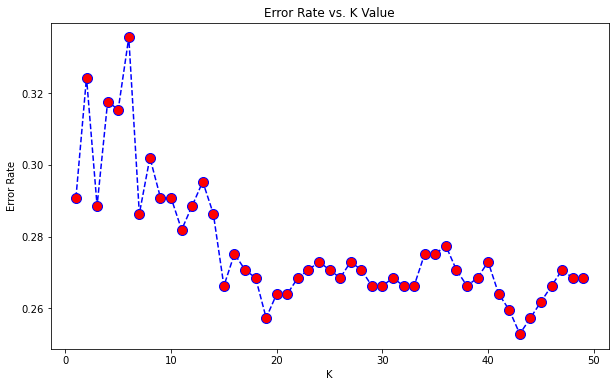

In [11]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [12]:
# Fitting K-NN to the Training set (4 variables)
knn = KNeighborsClassifier(n_neighbors = 42, metric = 'minkowski', p = 2).fit(X_train, y_train)

In [13]:
# Predicting the Test set results
y_pred1 = knn.predict(X_test)
knn.score(X_test,y_test)

0.7404921700223713

In [14]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)

[[207  41]
 [ 75 124]]


Модель KNN є краще, ніж попередня модель логістичної регресії. Так як коефіцієнт точності розпізнавання збільшився майже на 3%, а кількість помилково розпізнаних даних скоротилась 13. Стало менше як хибно позитивних, так і хибно негативних.

### Support Vector Machine (SVM)

In [15]:
# Fitting SVM to the Training set (4 variables)
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 10).fit(X_train, y_train)

In [16]:
# Predicting the Test set results
y_pred2 = svm.predict(X_test)
svm.score(X_test,y_test)

0.7114093959731543

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[195  53]
 [ 76 123]]


Дана модель є гіршою, ніж KNN як за коефіцієнтом детермінації, так і за кількістю помилково розпізнаних даних.
А от якщо порівнювати з моделлю логістичної регресії, то в них коефіцієнт розпізнавання даних є однаковим. Також однакова загальна кількість помилково розпізнаних даних. Але SVM має меншу кіл-сть хибно негативних значень, проте має більшу кіл-сть хибно позитивних значень.

### Naive Bayes

In [18]:
# Fitting Naive Bayes to the Training set (4 variables)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

In [19]:
# Predicting the Test set results
y_pred3 = nb.predict(X_test)
nb.score(X_test,y_test)

0.70917225950783

In [20]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred3)
print(cm)

[[196  52]
 [ 78 121]]


З усіх розглянутих на даний момент моделей, дана модель є найгіршою. Про це свідчить найменше значення точності та найбільша кіль-сть помилково розізнаних даних.

### Classification Tree

In [21]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeRegressor(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

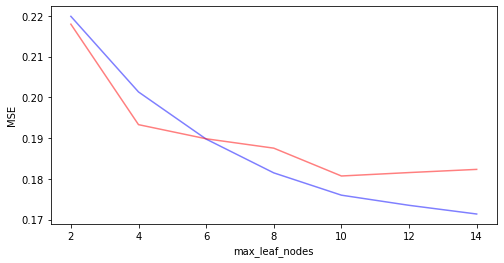

In [22]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10, 12, 14])

Так як найменше значення помилки на тестовій вибіркі спостерігається при max_leaf_nodes=10, то візбмемо в якості даного параметро саме число 10.

In [23]:
# Fitting Classification Tree to the Training set (2 variables)
from sklearn.tree import DecisionTreeClassifier
ct = DecisionTreeClassifier(max_leaf_nodes = 10, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [24]:
# Predicting the Test set results
y_pred4 = ct.predict(X_test)
ct.score(X_test,y_test)

0.7158836689038032

In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred4)
print(cm)

[[187  61]
 [ 66 133]]


Дана модель не є найкращою з усіх розглянутих. За коефіцієнтом детермінації вона поступається моделі KNN. В порівнянні з усіма іншими моделаями вона є трохи кращою за точністю прогнохування класу. Що стосується кіл-сті помилково розпізнаних данних, то вона має максимальну кількість хибно позитивних значень та мінімальну кіл-сть хибно негативних значень в порівнянні з усіма іншими моделями

Тепер побудуємо модель випадкового лісу

In [26]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

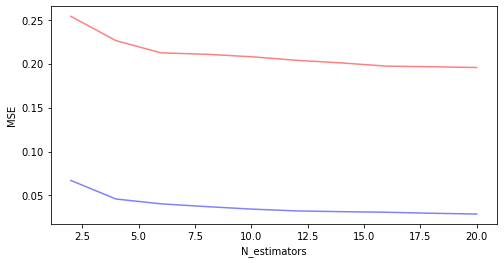

In [27]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestRegressor    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

Для моделі випадкового лісу в якості кількості дерев можна обрати 6.

In [28]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestRegressor(n_estimators=6, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

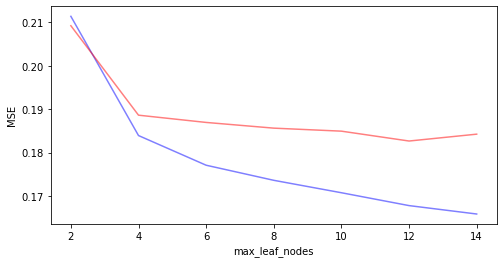

In [29]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10, 12, 14])

Так як найменше значення помилки на тестовій вибіркі при відносно невеликій розбіжності значень помилок на тренувальній та тестовій вибірках спостерігається при max_leaf_nodes=4, то візбмемо в якості даного параметро саме число 4.

In [30]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 6, max_leaf_nodes = 4, random_state = 10).fit(X_train, y_train)

In [31]:
# Predicting the Test set results
y_pred5 = rf.predict(X_test)
y_pred5 = (y_pred5 > 0.5)
rf.score(X_test,y_test)

0.23634731722325408

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred5)
print(cm)

[[185  63]
 [ 66 133]]


За коефіцієнтом правильно розпізнаних данних, дана модель є найгіршою і взагалі не може бути застосована на практиці через своє дуже мале значення

### Classification Neural Network

In [33]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


Побудуємо декілька нейронних мереж для класифікації. Будемо розглядати 5 різних архітектур - '4-3-1', '4-2-1', '4-3-2-1', '4-2-2-1', '4-4-1'. Кількість спостережнь в тренувальній вибірці дозволяє нам проекспериментувати з вказаними архітектурами моделі. Також кількість нейронів на прихованих шарах в даних моделях не перевищує подвоєнної кіл-сті пояснюючих змінних

In [34]:
# Initialising the ANN 4-3-1
cnn1 = Sequential()

# Adding the input layer and the first hidden layer
cnn1.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu', input_dim = 4))

# Adding the output layer
cnn1.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=3, kernel_initializer="uniform")`
  """
C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [35]:
# Fitting the ANN to the Training set
cnn1.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
1788/1788 [==============================] - 0s 266us/step - loss: 0.6854 - accuracy: 0.5638
Epoch 2/100
1788/1788 [==============================] - 0s 132us/step - loss: 0.6394 - accuracy: 0.6521
Epoch 3/100
1788/1788 [==============================] - 0s 143us/step - loss: 0.5967 - accuracy: 0.6868
Epoch 4/100
1788/1788 [==============================] - 0s 136us/step - loss: 0.5765 - accuracy: 0.6946
Epoch 5/100
1788/1788 [==============================] - 0s 131us/step - loss: 0.5679 - accuracy: 0.6969
Epoch 6/100
1788/1788 [==============================] - 0s 150us/step - loss: 0.5641 - accuracy: 0.6991
Epoch 7/100
1788/1788 [==============================] - 0s 131us/step - loss: 0.5618 - accuracy: 0.7025
Epoch 8/100
1788/1788 [==============================] - 0s 124us/step - loss: 0.5604 - accuracy: 0.7047
Epoch 9/100
1788/1788 [==============================] - 0s 134us/step - loss: 0.5592 - accuracy: 0.7058
Epoch 10/100
1788/1788 [==============================]

1788/1788 [==============================] - 0s 130us/step - loss: 0.5209 - accuracy: 0.7276
Epoch 79/100
1788/1788 [==============================] - 0s 121us/step - loss: 0.5208 - accuracy: 0.7276
Epoch 80/100
1788/1788 [==============================] - 0s 125us/step - loss: 0.5210 - accuracy: 0.7293
Epoch 81/100
1788/1788 [==============================] - 0s 128us/step - loss: 0.5212 - accuracy: 0.7299
Epoch 82/100
1788/1788 [==============================] - 0s 121us/step - loss: 0.5207 - accuracy: 0.7287
Epoch 83/100
1788/1788 [==============================] - 0s 123us/step - loss: 0.5207 - accuracy: 0.7287
Epoch 84/100
1788/1788 [==============================] - 0s 123us/step - loss: 0.5211 - accuracy: 0.7271
Epoch 85/100
1788/1788 [==============================] - 0s 130us/step - loss: 0.5209 - accuracy: 0.7271
Epoch 86/100
1788/1788 [==============================] - 0s 133us/step - loss: 0.5208 - accuracy: 0.7304
Epoch 87/100
1788/1788 [==============================] - 0

In [36]:
# Predicting the Test set results
y_pred6 = cnn1.predict(X_test)
y_pred6 = (y_pred6 > 0.5)

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred6)
print(cm1)

[[190  58]
 [ 68 131]]


In [38]:
# Initialising the ANN 4-2-1
cnn2 = Sequential()

# Adding the input layer and the first hidden layer
cnn2.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu', input_dim = 4))

# Adding the output layer
cnn2.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=2, kernel_initializer="uniform")`
  """
C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [39]:
# Fitting the ANN to the Training set
cnn2.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
1788/1788 [==============================] - 0s 168us/step - loss: 0.6861 - accuracy: 0.5666
Epoch 2/100
1788/1788 [==============================] - 0s 123us/step - loss: 0.6531 - accuracy: 0.6572
Epoch 3/100
1788/1788 [==============================] - 0s 123us/step - loss: 0.6140 - accuracy: 0.6885
Epoch 4/100
1788/1788 [==============================] - 0s 124us/step - loss: 0.5878 - accuracy: 0.6924
Epoch 5/100
1788/1788 [==============================] - 0s 124us/step - loss: 0.5745 - accuracy: 0.6946
Epoch 6/100
1788/1788 [==============================] - 0s 127us/step - loss: 0.5677 - accuracy: 0.69850s - loss: 0.5739 - accuracy: 0.
Epoch 7/100
1788/1788 [==============================] - 0s 135us/step - loss: 0.5643 - accuracy: 0.6980
Epoch 8/100
1788/1788 [==============================] - 0s 127us/step - loss: 0.5624 - accuracy: 0.7013
Epoch 9/100
1788/1788 [==============================] - 0s 127us/step - loss: 0.5612 - accuracy: 0.7092
Epoch 10/100
1788/1788 

1788/1788 [==============================] - 1s 303us/step - loss: 0.5321 - accuracy: 0.7232
Epoch 79/100
1788/1788 [==============================] - 1s 305us/step - loss: 0.5320 - accuracy: 0.7220
Epoch 80/100
1788/1788 [==============================] - 1s 305us/step - loss: 0.5320 - accuracy: 0.7232
Epoch 81/100
1788/1788 [==============================] - 1s 302us/step - loss: 0.5321 - accuracy: 0.7209
Epoch 82/100
1788/1788 [==============================] - 1s 304us/step - loss: 0.5317 - accuracy: 0.7237
Epoch 83/100
1788/1788 [==============================] - 1s 303us/step - loss: 0.5316 - accuracy: 0.7215
Epoch 84/100
1788/1788 [==============================] - 1s 313us/step - loss: 0.5314 - accuracy: 0.7204
Epoch 85/100
1788/1788 [==============================] - 1s 298us/step - loss: 0.5314 - accuracy: 0.7192
Epoch 86/100
1788/1788 [==============================] - 1s 303us/step - loss: 0.5314 - accuracy: 0.7215
Epoch 87/100
1788/1788 [==============================] - 1

In [40]:
# Predicting the Test set results
y_pred7 = cnn2.predict(X_test)
y_pred7 = (y_pred7 > 0.5)

In [41]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, y_pred7)
print(cm2)

[[194  54]
 [ 73 126]]


In [45]:
# Initialising the ANN 4-3-2-1
cnn3 = Sequential()

# Adding the input layer and the first hidden layer
cnn3.add(Dense(output_dim = 3, init = 'uniform', activation = 'relu', input_dim = 4))

# Adding the hidden layer
cnn3.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu'))

# Adding the output layer
cnn3.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=3, kernel_initializer="uniform")`
  """
C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2, kernel_initializer="uniform")`
  
C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [46]:
# Fitting the ANN to the Training set
cnn3.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
1788/1788 [==============================] - 0s 179us/step - loss: 0.6890 - accuracy: 0.5660
Epoch 2/100
1788/1788 [==============================] - 0s 133us/step - loss: 0.6586 - accuracy: 0.5660
Epoch 3/100
1788/1788 [==============================] - 0s 130us/step - loss: 0.6190 - accuracy: 0.5660
Epoch 4/100
1788/1788 [==============================] - 0s 158us/step - loss: 0.5999 - accuracy: 0.6281
Epoch 5/100
1788/1788 [==============================] - 0s 145us/step - loss: 0.5916 - accuracy: 0.6823
Epoch 6/100
1788/1788 [==============================] - 0s 133us/step - loss: 0.5861 - accuracy: 0.6868
Epoch 7/100
1788/1788 [==============================] - 0s 134us/step - loss: 0.5817 - accuracy: 0.6935
Epoch 8/100
1788/1788 [==============================] - 0s 133us/step - loss: 0.5781 - accuracy: 0.6997
Epoch 9/100
1788/1788 [==============================] - 0s 133us/step - loss: 0.5748 - accuracy: 0.7002
Epoch 10/100
1788/1788 [==============================]

1788/1788 [==============================] - 0s 143us/step - loss: 0.5271 - accuracy: 0.7304
Epoch 79/100
1788/1788 [==============================] - 0s 160us/step - loss: 0.5267 - accuracy: 0.7310
Epoch 80/100
1788/1788 [==============================] - 0s 149us/step - loss: 0.5267 - accuracy: 0.7327
Epoch 81/100
1788/1788 [==============================] - 0s 140us/step - loss: 0.5269 - accuracy: 0.7310
Epoch 82/100
1788/1788 [==============================] - 0s 154us/step - loss: 0.5264 - accuracy: 0.7304
Epoch 83/100
1788/1788 [==============================] - 0s 182us/step - loss: 0.5267 - accuracy: 0.7287
Epoch 84/100
1788/1788 [==============================] - 0s 148us/step - loss: 0.5264 - accuracy: 0.7315
Epoch 85/100
1788/1788 [==============================] - 0s 157us/step - loss: 0.5266 - accuracy: 0.7310
Epoch 86/100
1788/1788 [==============================] - 0s 158us/step - loss: 0.5267 - accuracy: 0.7293
Epoch 87/100
1788/1788 [==============================] - 0

In [47]:
# Predicting the Test set results
y_pred8 = cnn3.predict(X_test)
y_pred8 = (y_pred8 > 0.5)

In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, y_pred8)
print(cm3)

[[192  56]
 [ 66 133]]


In [49]:
# Initialising the ANN 4-2-2-1
cnn4 = Sequential()

# Adding the input layer and the first hidden layer
cnn4.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu', input_dim = 4))

# Adding the hidden layer
cnn4.add(Dense(output_dim = 2, init = 'uniform', activation = 'relu'))

# Adding the output layer
cnn4.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=2, kernel_initializer="uniform")`
  """
C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=2, kernel_initializer="uniform")`
  
C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


In [50]:
# Fitting the ANN to the Training set
cnn4.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
1788/1788 [==============================] - 0s 195us/step - loss: 0.6892 - accuracy: 0.5660
Epoch 2/100
1788/1788 [==============================] - 0s 137us/step - loss: 0.6529 - accuracy: 0.5660
Epoch 3/100
1788/1788 [==============================] - 0s 158us/step - loss: 0.6102 - accuracy: 0.5677
Epoch 4/100
1788/1788 [==============================] - 0s 149us/step - loss: 0.5923 - accuracy: 0.6902
Epoch 5/100
1788/1788 [==============================] - 0s 137us/step - loss: 0.5842 - accuracy: 0.7036
Epoch 6/100
1788/1788 [==============================] - 0s 150us/step - loss: 0.5774 - accuracy: 0.7103
Epoch 7/100
1788/1788 [==============================] - 0s 146us/step - loss: 0.5717 - accuracy: 0.7153
Epoch 8/100
1788/1788 [==============================] - 0s 163us/step - loss: 0.5663 - accuracy: 0.7181
Epoch 9/100
1788/1788 [==============================] - 0s 147us/step - loss: 0.5619 - accuracy: 0.7209
Epoch 10/100
1788/1788 [==============================]

1788/1788 [==============================] - 0s 139us/step - loss: 0.5268 - accuracy: 0.7304
Epoch 79/100
1788/1788 [==============================] - 0s 134us/step - loss: 0.5267 - accuracy: 0.7310
Epoch 80/100
1788/1788 [==============================] - 0s 126us/step - loss: 0.5268 - accuracy: 0.7287
Epoch 81/100
1788/1788 [==============================] - 0s 136us/step - loss: 0.5271 - accuracy: 0.7293
Epoch 82/100
1788/1788 [==============================] - 0s 128us/step - loss: 0.5268 - accuracy: 0.7315
Epoch 83/100
1788/1788 [==============================] - 0s 133us/step - loss: 0.5267 - accuracy: 0.7304
Epoch 84/100
1788/1788 [==============================] - 0s 138us/step - loss: 0.5267 - accuracy: 0.7310
Epoch 85/100
1788/1788 [==============================] - 0s 135us/step - loss: 0.5267 - accuracy: 0.7315
Epoch 86/100
1788/1788 [==============================] - 0s 135us/step - loss: 0.5270 - accuracy: 0.7287
Epoch 87/100
1788/1788 [==============================] - 0

In [51]:
# Predicting the Test set results
y_pred9 = cnn4.predict(X_test)
y_pred9 = (y_pred9 > 0.5)

In [52]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred9)
print(cm4)

[[189  59]
 [ 66 133]]


In [53]:
# Initialising the ANN 4-4-1
cnn5 = Sequential()

# Adding the input layer and the first hidden layer
cnn5.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu', input_dim = 4))

# Adding the output layer
cnn5.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn5.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4, units=4, kernel_initializer="uniform")`
  """
C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [54]:
# Fitting the ANN to the Training set
cnn5.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\38095\anaconda3\envs\labvika\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
1788/1788 [==============================] - 0s 176us/step - loss: 0.6856 - accuracy: 0.5839
Epoch 2/100
1788/1788 [==============================] - 0s 130us/step - loss: 0.6407 - accuracy: 0.6879
Epoch 3/100
1788/1788 [==============================] - 0s 128us/step - loss: 0.5932 - accuracy: 0.6963
Epoch 4/100
1788/1788 [==============================] - 0s 130us/step - loss: 0.5737 - accuracy: 0.6969
Epoch 5/100
1788/1788 [==============================] - 0s 148us/step - loss: 0.5666 - accuracy: 0.7075
Epoch 6/100
1788/1788 [==============================] - 0s 128us/step - loss: 0.5627 - accuracy: 0.7086
Epoch 7/100
1788/1788 [==============================] - 0s 130us/step - loss: 0.5598 - accuracy: 0.7114
Epoch 8/100
1788/1788 [==============================] - 0s 126us/step - loss: 0.5574 - accuracy: 0.7114
Epoch 9/100
1788/1788 [==============================] - 0s 139us/step - loss: 0.5542 - accuracy: 0.7086
Epoch 10/100
1788/1788 [==============================]

1788/1788 [==============================] - 0s 186us/step - loss: 0.5209 - accuracy: 0.7293
Epoch 79/100
1788/1788 [==============================] - 0s 159us/step - loss: 0.5210 - accuracy: 0.7260
Epoch 80/100
1788/1788 [==============================] - 0s 174us/step - loss: 0.5210 - accuracy: 0.7287
Epoch 81/100
1788/1788 [==============================] - 0s 139us/step - loss: 0.5208 - accuracy: 0.7299
Epoch 82/100
1788/1788 [==============================] - 0s 138us/step - loss: 0.5209 - accuracy: 0.7299
Epoch 83/100
1788/1788 [==============================] - 0s 130us/step - loss: 0.5211 - accuracy: 0.7310
Epoch 84/100
1788/1788 [==============================] - 0s 130us/step - loss: 0.5209 - accuracy: 0.7260
Epoch 85/100
1788/1788 [==============================] - 0s 134us/step - loss: 0.5206 - accuracy: 0.7276
Epoch 86/100
1788/1788 [==============================] - 0s 124us/step - loss: 0.5207 - accuracy: 0.7299
Epoch 87/100
1788/1788 [==============================] - 0

In [55]:
# Predicting the Test set results
y_pred10 = cnn5.predict(X_test)
y_pred10 = (y_pred10 > 0.5)

In [56]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred10)
print(cm5)

[[191  57]
 [ 68 131]]


За кількістю помилково розпізнаних данних дана модель не виявилась найкращою. Кількість помилково розпізнаних даних є більше, ніж у моделі KNN.
Якщо ж порівняти між собою розглянуті архітектури нейронних мереж за кількістю помилково розпізнаних даних, то найкращою виявилась модель 4-3-2-1. Вона має лише 122 помилково розпізнаних спостереження. Найгіршою є 4-2-2-1. Вона має 127 неправильно визначених результата.
Найкращою з усіх розглянутих моделей виявилась модель KNN. Саме її варто застосовувати при визначенні того чи буде користувач надавати більше переваги вину чи ні.